# Natural Language Processings of Bookings.com Hotel Reviews - Exploratory Data Analysis 

Pippi de Bree

## Table of contents
#### [Introduction](#Introduction)

#### [Imports](#Imports)

#### [Data Set](#Data-Set)

#### [Data Wrangling](#Wrangling)
- Data Format
- Duplicates
- Missing Values


#### [Exploratory Data Analysis](#EDA)
- Dependant Variable
- Independent Variables 
    - Numeric Variables
    - Categorical Variables

#### [Conclusion](#Conclusion)

# Introduction <a id=Introduction a>

This project considers the importance of 

In this notebook we will begin readying our data for making predictions on whether a reviewer scored a hotel well. The data contains various forms that will be altered into forms that are better encodable for modelling. We will explore different options for making categorical data usable in common classification models by looking at Encoding and Vectorising Strings of Words. 

# Imports <a id=Imports a>

Below we import some standard libraries that allow us to work more easily with the format of the data and perform statistical analysis.

We also import a `ds_utils.py`, my personal library of Data Science functions that are used throughout this analysis. Their uses are explained here but there is more detailed explainations in the file, located in the current directory.

In [34]:
# pandas and numpy are used for data format, for easier manipulation.
import pandas as pd
import numpy as np

In [35]:
# gives us access to math function
import math

In [36]:
# seaborn and variables matplotlib packages are used for visualiations.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [37]:
# Here I am importing my personal library of data science tools and functions
import ds_utils 
import hotel_nlp


# Data Set <a id=Data-Set a>
## Data Read In 

In order to read in our data we will use a method from the `ds_utils` package, which returns information about the missing values and duplicates.

In [38]:
hr = ds_utils.read_csv_pd("data/Hotel_Reviews.csv")

The DataFrame contains 515738 rows and 17 columns.
There are 6536 missing values and 526 duplicated rows.


As can bee seen, there are some issues with the cleanliness of the data, but to ensure that it was well imported we will first check the form of the dataframe. 

In [39]:
# getting first 5 rows
hr.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


From this we can see that we have correctly read in our data, as all values in in columns that look correct and the index was created by the read in. We do know, however, that there are some changes we can make to make our data more usable. Before we do this, we are going to describe the format that the data is currently in. 

# Data Wrangling <a id=Wrangling a>

## Data Format

It is important to understand the current form of the data, so that we can best use it to create our model. From our read in we know there are 515738 rows and 17 columns. As we are trying to predict the score a reviewer gave to to a specific variable, we will need to look at which columns, of the 16 others, could potentially be used as independent variables (though we may consider creating more from the columns we have). The columns, as they appear in the dataset, are listed below. 

In [40]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

The variable we are going to try to predict: 

- `Reviewer_Score` - This is a score out of 10 that the user gave the hotel based on their experience. 

Based on:
- `Hotel_Address` - This is a string of the address of the hotel 
- `Additional_Number_of_Scoring` - This is an integer, but the meaning of this column is not entirely clear. Given that we do not know the datasource, it is hard to know how this variable will behave. We will consider this further when we begin modelling. 
- `Review_Date` - This an object that contains the date the review was given (we may consider changing this to a datetime type).
- `Average_Score` - This float is the average of the scores for the specific hotel 
- `Hotel_Name` - This is a string object for the name of the hotel.
- `Reviewer_Nationality` - This is a string object for the country where the rater is from. 
- `Negative_Review` - This is a string that contains a negative review for the hotel stay. 
- `Review_Total_Negative_Word_Counts` - This is a count of 'negative' words used in the review (we may want to look more deeply into the definition of a negative word. It is an int, which makes sense. 
- `Total_Number_of_Reviews` - Total number of reviews is the total number of reviews for the 
- `Positive_Review` - This is a string that contains a positive review for the hotel stay.
- `Review_Total_Positive_Word_Counts` - This is a count of 'positive' words used in the review (we may want to look more deeply into the definition of a positive word. It is an int, which makes sense. 
- `Total_Number_of_Reviews_Reviewer_Has_Given` - This int tracks the total number of reviews done by this specific reviewer
- `Tags` - This is an object, specifically a list, that contains the 'tags' associated with the review.
- `days_since_review` - This is an object that contains the number of days since the review was made (from this we could see the 'current' date of the dataset). (We will want to transform this from a string to an int).   
- `lat` - A float for the latitude of the hotel 
- `lng` - A float for the longitude of the hotel


Format changes to consider: 
- Datetime datatype for `Review_Date`
- Check that `Additional_Number_of_Scoring` is what we think it is. 
- Check that `Average_Score` is calculated how we think it would be. 
- What defines a positive review, and what defines a negative review? Why are there two for some data points?
- Which words are used for tags? (We will want to transform this).
- Change the type of `days_since_review` to an int. 
- Check that lat and long are the same for all hotels
- Look to see which hotels are missing values (and if we can use data we already have to fill these).
    
We will consider potential transformations for these columns after handling duplicated rows and missing values. 

## Duplicates 

In our data import we saw that there are 526 duplicated rows, but before removing these it is helpful to look more deeply (there may be a reason for these duplications). We will see if there are any cases of the duplicates being multiples but checking for duplicates within this dataframe. 

In [41]:
# Calculating how many duplicate appear more than once
print("The number of duplicated rows that appear more than once is:", hr[hr.duplicated()].duplicated().sum())

The number of duplicated rows that appear more than once is: 0


There are no duplicates that occur more than twice in the original dataset, so there is no specific case that we over-added. Before we drop these duplicates we will look into the missing values. 

## Missing Values

The output from the `hr.info()` call above shows us that there are only missing values in the `lat` and `lon` variables. In order to explore the missing data, we will implement a function from the `hotel_nlp` package named `hotel_missing_explo`. It will consider the issues as described below.

We expect to only see missing values for `lat` and `lon` and it could be assumed that, because there are the same number missing from both attributes, all rows missing `lat` are also missing `lon`. It would be helpful to be sure that these missing values are all from the same row, so this will be checked in the function.

Given that coordinate data is missing, we can look more deeply into the locations at which this is happening. We will do this by grouping by address. We can then check wehter there is data for the hotels which have missing data. In other words, do we have access to the missing data already (as it could be reported for the hotel in other rows). To do this we will see if any of these hotels appear in the list of hotels for data points that are not missing any values. 


In [42]:
hotel_nlp.hotel_missing_explo(hr)

Missing values by column:
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


	All missing values from 'lat' are also missing 'lng' values.


Hotel Addresses with missing

As this intersection is empty, we know that we cannot use any of the data we already have to fill in our missing latitude and longitude data. We expect to lose 3268 rows and, given that we expect to have 515212 rows after removing duplicates, we should end up with 51194 rows. Further exploration into filling these missing values would definitely be good practice but, given that we are going to use a sample of this data, we are going to drop these missing values.

In [43]:
hr_clean = ds_utils.remove_duplicates_and_missing(hr)

There are 6536 missing values and 526 duplicated rows.

526 duplicates removed.

6536 missing values remaining

Resulting DataFrame has 0 missing values and 0 duplicated rows. There are 511944 rows remaining.


From this output we can see that we have lost the correct number of rows. Now that we are happy with the shape and format of our data, we can begin to look more deeply into the how our attributes are formed. However, we will first save this cleaned version of our data. 

In [44]:
# Exporting the clean version of our data to the 'data' folder
hr_clean.to_csv('data/Hotel_Reviews_Clean.csv', index=False)

# Exploratory Data Analysis <a id=EDA a>

Now, we are ready to begin exploring the relationships between our variables. We will start with the form of our depenedent variable (which we are trying to predict) - `Reviewer_Score`.

## Dependent Variable - `Reviewer_Score`

As we are aiming to predict `Reviewer_Score` it is a good idea to begin by looking into this variable. The variable is originally a numeric value, so we will look into this distribution. My expectation would be that there would be a lot of very high rankings and a lot of low rankings. Intuitively, to me, when ranking people are fairly binary and really like something or really dislike it. 

In [45]:
hr_clean['Reviewer_Score'].unique()

array([ 2.9,  7.5,  7.1,  3.8,  6.7,  4.6, 10. ,  6.5,  7.9,  5.8,  9.2,
        8.8,  6.3,  5.4,  9.6,  8.3,  4.2,  3.3,  5. ,  2.5,  3.1,  6. ,
        5.5,  9.5,  8. ,  8.5,  9. ,  4.5,  7. ,  5.6,  8.1,  6.9,  9.4,
        3. ,  4. ,  3.5,  4.4])

Reviewer_Score Summary Statistics:
count    511944.000000
mean          8.396053
std           1.637778
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64


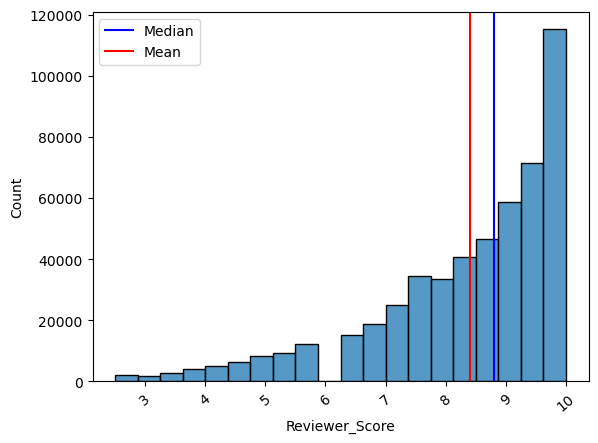

In [46]:
ds_utils.num_var(hr_clean[['Reviewer_Score']])

From this we can see that there is a major skew towards positive, and high ranking, reviews. This was not what I expected, as I thought there would be more negative reviews. This is potentially indicative of people not giving as many negative reviews, or not reflecting their opinions in their scores. It may also be the result of a biased dataset, maybe the hotels are too nice! 

Given that we are going to predict reviewer score, this distribution is an issue because if we use data that is heavily skewed towards positive reviews, our model will be as well. We will consider this issue further when creating our classes. As we are going to use classification to predict `Reviewer_Score` we need to change our data from numeric to categorical. It makes sense intuitively to do this, as it is more helpful to find rounded rating values (i.e. an integer) rather than a specific decimal rating. This can also be backed up by the fact that there is not a large range of decimal values - there are only 37 distinct ratings. If a continuous variable was going to be predicted, it would be more robust if there were far more distinct values (particularly as there are over half a million data points). 

The ranking is out of 10, so we assume that categories can go from 1 to 10. However, from the description output above, we know that the minimum is 2.5 - meaning that there are no ratings below this. In order to fairly create these buckets, the intention was to use the `numpy.round` function, because this essentially create a bin of all rows where the values falls within the range of half a number above and half below (e.g. 4.5 =< x < 5.5 would all be given the integer label 5). (Note we are rounding all values from .5 and up to the higher integer and below .5 to the lower). We can also consider the fact that the 10 bin can only get data from half the range, compared to the other values. However, because the data is so skewed we are not worried about missing out on this data. 

With this intention, and the fact that the minimum value is exactly 2.5, we will only get integer categories from 3 to 10 and will only look at the review scores from 3 to 10. 

However, when looking at the numpy.round function we saw that this function always rounds .5 values down. From the output above, we know that the scores only have one decimal point, so we will add 0.01 to every value. This will make .5 values round up and all other variables will not be affected because .4 will be .41 and values above 10 will be rounded down. 

As mentioned, we are doing this by rounding, and then we will make the datatype `int` for easily categorical work. We will not need to complexity of the float values for `Reviewer_Score`, so we will reassign our rounded version to this varibale name. 

In [47]:
# replacing the variable with a rounded verison
hr_clean['Reviewer_Score'] = round(hr_clean['Reviewer_Score'] + 0.01).astype(int)

From the histogram above we know that the data is very skewed towards high scores, and this would not change after our rounding. For completeness, we will look at the distribution of our new categorical variable.

    Reviewer_Score
10          186594
8           108716
9           105382
7            44101
6            27244
5            24122
4             9236
3             6549


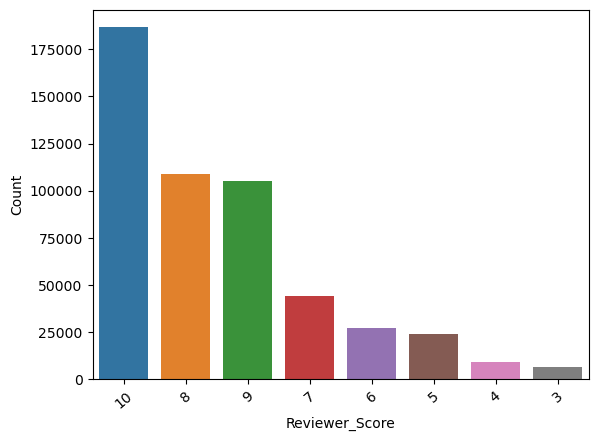

In [48]:
ds_utils.cat_var(hr_clean[['Reviewer_Score']])

From this output we can see that we still have a serious skew towards positive reviews. This is going to be an issue when we begin modelling because with a skew our models will have an inherent bias. Fortunately, we can combat this when training our model, as we can ensure that our sample has an equal distribution between categories.

## Independent Variables 

Now we can start to look at the variables we may use to predict `Reviewer_Score`. It is helpful to think about these in two groups: numeric and non-numeric. Doing this will make it easier to explore the impact. 

To begin this we will use the `ds_utils` function `num_cat_col()`, which reports on the number of numeric and categorical variables and then returns dataframes with the values. As we are only looking at independent variables, we will omit `Reviewer_Score` from this analysis.

In [49]:
hr_num_clean, hr_cat_clean = ds_utils.num_cat_cols(hr_clean[['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
       'days_since_review', 'lat', 'lng']])

The Numeric columns: 
	Additional_Number_of_Scoring,
	Average_Score,
	Review_Total_Negative_Word_Counts,
	Total_Number_of_Reviews,
	Review_Total_Positive_Word_Counts,
	Total_Number_of_Reviews_Reviewer_Has_Given,
	lat,
	lng

The Categorical columns: 
	Reviewer_Nationality,
	Hotel_Name,
	Positive_Review,
	Review_Date,
	Hotel_Address,
	Tags,
	Negative_Review,
	days_since_review


The listed above groupings show us the numeric and non-numeric datatypes, stated as categorical. If we think more deeply about the actual numeric columns, it makes sense that these are all numeric. All of the variables, except lat and lon are intuitivly numeric as they are measures of some value. The lat and lon columns are slightly more complex as they are numeric based on location. We will start by diving more deeply into these numeric columns.

## Numeric Values 

Our numeric attributes, as listed above, will be summarised using the `num_var` feature from the utils library. This will show us basic summaries of the attributes so that we can consider looking more deeply. 

Additional_Number_of_Scoring Summary Statistics:
count    511944.000000
mean        500.456802
std         501.549523
min           1.000000
25%         169.000000
50%         343.000000
75%         666.000000
max        2682.000000
Name: Additional_Number_of_Scoring, dtype: float64


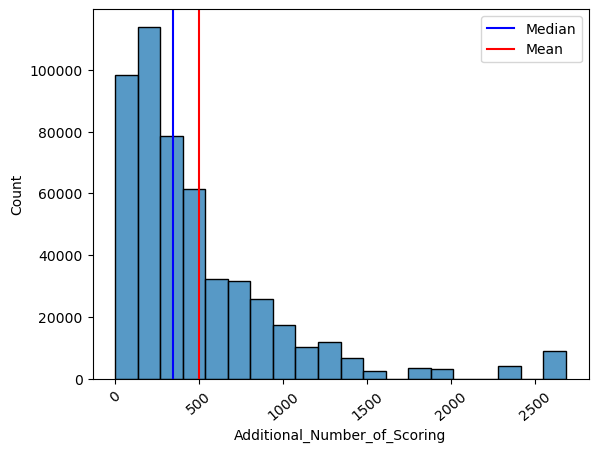

Average_Score Summary Statistics:
count    511944.000000
mean          8.398216
std           0.549038
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64


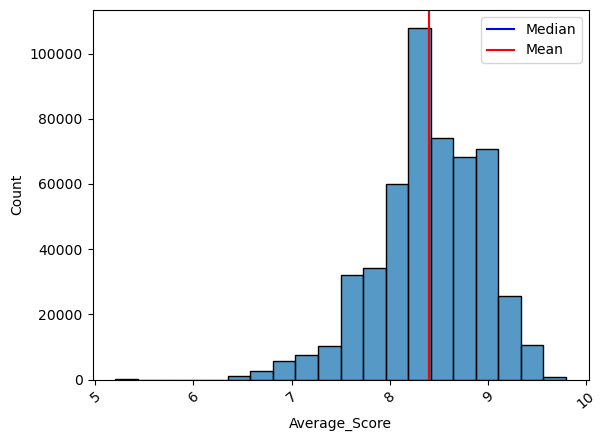

Review_Total_Negative_Word_Counts Summary Statistics:
count    511944.000000
mean         18.543247
std          29.696878
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: Review_Total_Negative_Word_Counts, dtype: float64


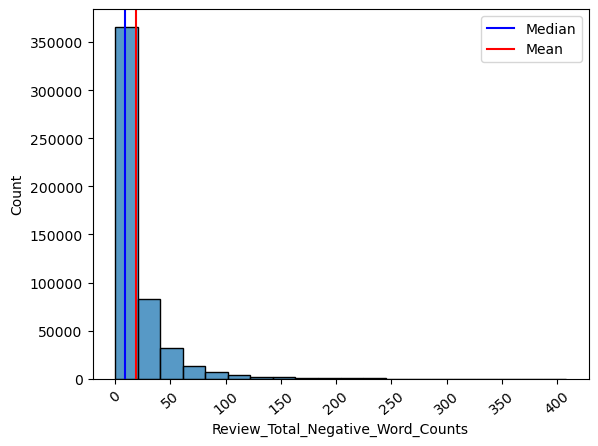

Total_Number_of_Reviews Summary Statistics:
count    511944.000000
mean       2748.469807
std        2323.330791
min          43.000000
25%        1161.000000
50%        2134.000000
75%        3633.000000
max       16670.000000
Name: Total_Number_of_Reviews, dtype: float64


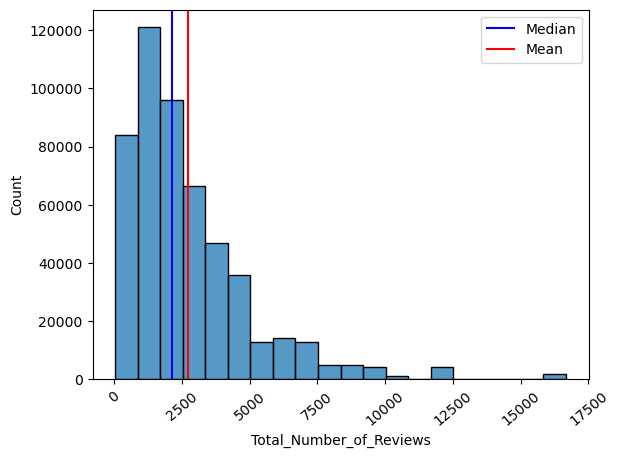

Review_Total_Positive_Word_Counts Summary Statistics:
count    511944.000000
mean         17.766849
std          21.789369
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64


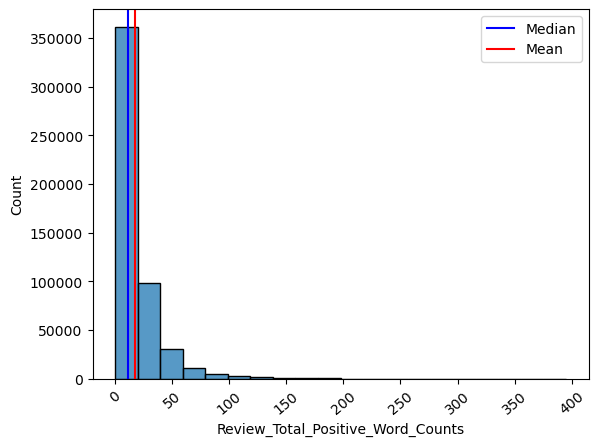

Total_Number_of_Reviews_Reviewer_Has_Given Summary Statistics:
count    511944.000000
mean          7.151145
std          11.028050
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: float64


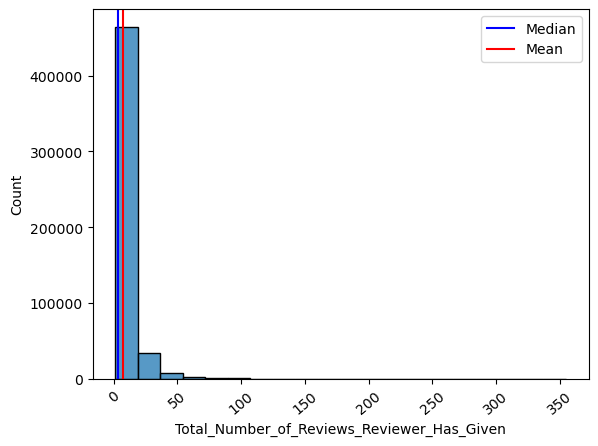

lat Summary Statistics:
count    511944.000000
mean         49.443040
std           3.468029
min          41.328376
25%          48.214277
50%          51.499981
75%          51.516288
max          52.400181
Name: lat, dtype: float64


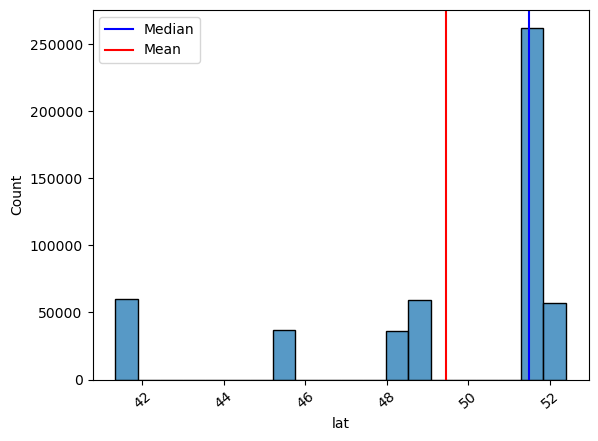

lng Summary Statistics:
count    511944.000000
mean          2.824222
std           4.581637
min          -0.369758
25%          -0.143649
50%          -0.000250
75%           4.834443
max          16.429233
Name: lng, dtype: float64


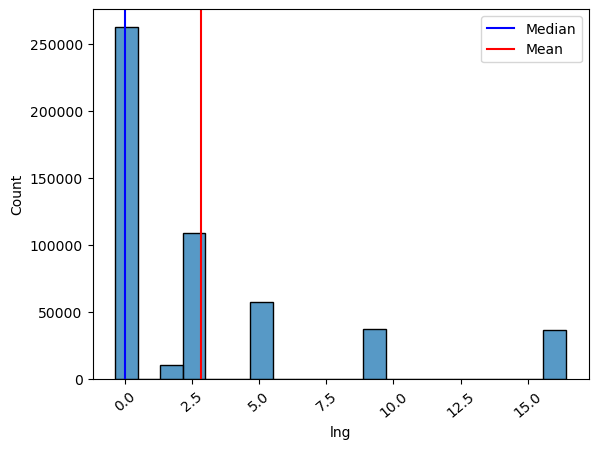

In [50]:
ds_utils.num_var(hr_clean[hr_num_clean])

In [51]:
hr_clean[hr_num_clean].columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'lat', 'lng'],
      dtype='object')

From this output above we can see that there are some skews in our numeric variables. 

`Additional_Number_of_Scoring` - This is right skew because the mean is higher than the mean. 

`Average_Score` - Though this does not look entirely normal, the distribution is not at all skewed, from the summary statistics we can see that the mean is 8.397 and the median is 8.4. It may be a good idea to bin this data into whole number categories, as we have done with `Reviewer_Score`.

`Review_Total_Negative_Word_Counts` - It makes sense that this output is so right skewed because there are a quite a few instances where there are no negative words, so this value is 0. The code below shows that this is nearly 25%. 

In [52]:
print("Proportion 0 \"Review_Total_Negative_Word_Counts\":",
      round((hr_clean['Review_Total_Negative_Word_Counts'] == 0).sum() / len(hr_clean), 2))
print("Proportion 0 \"Review_Total_Positive_Word_Counts\":",
      round((hr_clean['Review_Total_Positive_Word_Counts'] == 0).sum() / len(hr_clean), 2))

Proportion 0 "Review_Total_Negative_Word_Counts": 0.25
Proportion 0 "Review_Total_Positive_Word_Counts": 0.07


`Total_Number_of_Reviews` - For this variable there is a large spread, the median is near 2000 while the max is more than 16,000. This makes sense given that hotels have different capacities and there may be an element of seasonality that affects some more than others. For this class it may be useful to create a dummy variable of whether a user is a frequent reviewer or not. If we take the median value from the IQR, 3, as a cut off, we could see any reviewer who has reviewed more than this as someone who frequently reviews the hotels they stay at. 

`Review_Total_Positive_Word_Counts` - There are a lot less zero values for this variable than  `Review_Total_Negative_Word_Counts`, as the code above shows only 7% have no positive words. This may be the result of the major skew towards positive reviews that we see in the dataset as a whole.

`Total_Number_of_Reviews_Reviewer_Has_Given` - This variable is interesting because it shows that there are some guests who write a lot of hotel reviews, but most have written less than 10. It could be suggested that these extreme reviewers are outliers, but it seems more intuitive to think that they may be important to keep in our dataset. 

`lat & lng` - These are harder to interpret numerically, but the histograms do show that there may be areas where the hotels are grouped together. These locations may be potentially have an impact on overall review score - if these hotels are in a city that is loved the reviews may skew more positive because of this.

### Potential Alterations for Numeric Variables

Leave as is: 
- `lat`
- `lng`

Binning:
- `Average_Score`
- `Total_Number_of_Reviews`
- `Total_Number_of_Reviews_Reviewer_Has_Given`

Unsure About Using (Leave as is for now)
- `Additional_Number_of_Scoring`
- `Review_Total_Negative_Word_Counts`
- `Review_Total_Positive_Word_Counts`

Now that we have looked into our Numeric Columns it is time to consider the non-numeric columns.

## Non-Numeric Values 

Looking into non-numeric values is important because these are not as easily usable in many models. For this reason we need to consider ways we could make changes to these variables in order to have them contribute to our modelling. Before diving deeply into specific variables, it is helpful to have an overview of their distribution. Like with the numeric variables we will use a function from the `ds_utils` library, but this time geared towards categorical variables. 

As a reminder, our non-numeric variables are:
- `Hotel_Address`
- `Review_Date`
- `Hotel_Name`
- `Reviewer_Nationality`
- `Negative_Review`
- `Positive_Review`
- `Tags`
- `days_since_review`

In [53]:
ds_utils.cat_var(hr_clean[hr_cat_clean])

Number of Unique Reviewer_Nationality Values: 227
Number of Unique Hotel_Name Values: 1475
Number of Unique Positive_Review Values: 409941
Number of Unique Review_Date Values: 731
Number of Unique Hotel_Address Values: 1476
Number of Unique Tags Values: 54934
Number of Unique Negative_Review Values: 327927
Number of Unique days_since_review Values: 731


From this output we can see that there are some variables with very high numbers of unique values. At this point it is helpful to look at the categories specifically. 

###  `Hotel_Address` and `Hotel_Name`

From our datatype exploration we saw that the values in these columns are strings of the address of the hotel and the hotel name. Both of these variables could be used as a unique identifier for the hotels. However, this assumption is based on the fact that there are no hotels with the same name, but different addresses. From the unique number outputs above we can see that there are 1493 `Hotel_Address` values but only 1492 `Hotel_Name` values. This is an issue that we may have beyond the dataset, if we were to add more data, so we want to avoid this. 

Both of these columns can be turned to numeric encodings of for the unique hotels. However, to be sure that the each hotel is unique represented in the data it makes more sense to use `Hotel_Address` because no two hotels can have identical addresses. When we encode this we will loose the location information we could get from this, but we do not mind this because we already have location data in the form of `lat` and `lon`. After doing this, `Hotel_Name` will be redundant, so we may consider dropping it. 

We can, however, look at if we can use the information stored with in the `Hotel_Address` variable to create a new variable. For example, country or city variables could be extracted. To check the viability of this we will look at the unique words at the end of the strings (our exploration showed that these tend to be the country, and that city is the word before). 

In [68]:
print(hr_clean['Hotel_Address'].str.split(' ').apply(lambda x: x[-1]).unique())

['Netherlands' 'Kingdom' 'France' 'Spain' 'Italy' 'Austria']


From this we can see that there are only six unique countries in the dataset (if the country appaeared anywhere else in the string it could not be represented here by another country). We will check how many cities are represented, on the assumption that the city comes as the second to last word.

In [74]:
print(hr_clean['Hotel_Address'].str.split(' ').apply(lambda x: x[-2]).unique())

['Amsterdam' 'United' 'Paris' 'Barcelona' 'Milan' 'Vienna']


We know that `Kingdom` represents the United Kingdom because all the other cities map to a specific country. As these mappings are one-to-one, it makes sense to only continue on with the country as a potential new variable. This is contingent on there only being reviews for hotels in London for UK addresses.

In [91]:
print(len(hr_clean[hr_clean['Hotel_Address'].str.split(' ').apply(lambda x: x[-1]) == 'Kingdom']) == sum(hr_clean['Hotel_Address'].str.contains("London")))

True


Every hotel in the UK, in this dataset, is in London. Therefore, a city attribute would be redundant and only country will be used - this will be added in the preprocessing.

### `Review_Date` and `days_since_review`

From the number of unique values seen above, it is clear that `Review_Date` and `days_since_review` are very linked. We will use the `equal_transform` function from the utils library to see whether these variables are essentially transformations of one another. 

In [90]:
ds_utils.equal_transform(hr_clean['Review_Date'],hr_clean['days_since_review'])

Series are equal.


From this we can see that these two are inherently linked - because of this we may consider that only one of these two will add value to our modelling. From our inspection of datatypes we saw that the `Review_Date` column is in the form of a string, however we can easily change this to a datetime type. The `days_since_review` variable is also in the form of a string, and can very easily be transformed into a numeric column. Using an integer, rather than datatype, version of this data would be easier when thinking about applying the data to models.

Therefore we will leave `Review_Date` as is, because we will not use it in our modelling. Instead we will go ahead with altering the `days_since_review` variables. This will be done using a lambda function. The string is split by the space between the digits and the 'day' or 'days' distinction, from these lists just the first value, the digits, are selected and these are then turned to integers.

We will check this transformation with the `equal_transform` function.

In [55]:
# making the transformation 
days_transform = hr_clean['days_since_review'].apply(lambda x: int(x.split(" ")[0]))

# checking the value counts of the transformation is equal before and after. 
ds_utils.equal_transform(hr_clean['days_since_review'],days_transform)

Series are equal.


As these are equal we can permanently make this change to our dataset.

In [56]:
# Changing out string days since review to an integer
hr_clean['days_since_review'] = days_transform

Now that we have changed `days_since_review` to a numeric variable, it is helpful to look at it's distribution.

days_since_review Summary Statistics:
count    511944.000000
mean        354.359768
std         208.894266
min           0.000000
25%         175.000000
50%         353.000000
75%         527.000000
max         730.000000
Name: days_since_review, dtype: float64


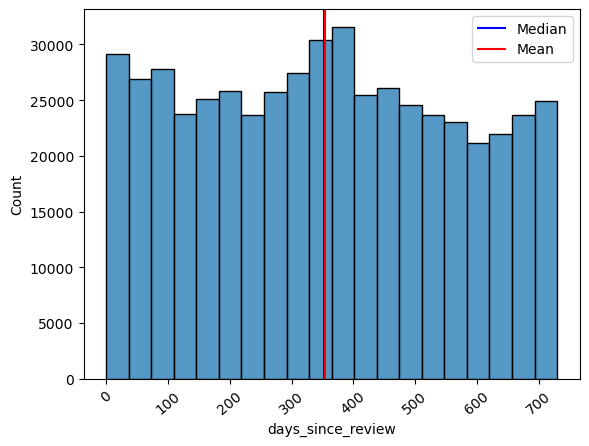

In [57]:
# using the ds_utils variable 
ds_utils.num_var(hr_clean[['days_since_review']])

This data is fairly equally distributed, so we may want to consider binning it. 

### `Reviewer_Nationality`

In [58]:
hr_clean[['Reviewer_Nationality']].head()

,Reviewer_Nationality
0,Russia
1,Ireland
2,Australia
3,United Kingdom
4,New Zealand


This variable has 227 unique variables and for this reason could definitely be turned into a numeric encoding. As with `Hotel_Address`, we will consider this after looking at all of the potential changes to categorical variables. This variable may be useful in our analysis as there may be a cultural factor that this variable may pick up on.

### `Negative_Review` and `Positive_Review`

In [59]:
hr_clean[['Negative_Review', 'Positive_Review']].head()

,Negative_Review,Positive_Review
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...
1,No Negative,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...
4,You When I booked with your company on line y...,Amazing location and building Romantic setting


These variables are more complicated to handle but are very valuable in terms understanding the experience a reviewer had. The words used in these reviews in themselves will have value in deciding if a review is positive or not. For this reason, we will use a vectoriser to look into which words, or lemmas, are relevant in predicting whether a review is positive or negative. However, we do see that there are instances of `No Negative` review in the `Negative_Review` variable.

In [60]:
print("Number of \'No Negative\' values in \'Negative_Review\':",
      len(hr_clean[hr_clean['Negative_Review'] == 'No Negative']))
print("Number of \'No Positive\' values in \'Positive_Review\':",
      len(hr_clean[hr_clean['Positive_Review'] == 'No Positive']))

Number of 'No Negative' values in 'Negative_Review': 126902
Number of 'No Positive' values in 'Positive_Review': 35695


As we are going to vectorise these, we will remove these words and replace them with an empty string, so that no values can come from these (we will do this in our preprocessing). 

### `Tags`

In [62]:
# Looking at the start of the tags column
hr_clean[['Tags']].head()

,Tags
0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,"[' Leisure trip ', ' Family with young childre..."
3,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


The tags variable is interesting because it is a list of attributes associated with the specific stay at the hotel. It could add a layer of understanding of the reviewer and their reason for the trip. For example the reviewer being a solo traveller vs with a family or in a couple could change their perspective. There are many cases of these differences in trip. We could turn this into a long string and then vectorise the tags, but these values do not have judgement in them like the strings with the actual reviews. These are more general so could be considered more as categories than having sentiment, for this reason we will want to encode these so that we know which data points are similar in this way. There is an issue in that there is a lot of data that can be considered here, below we look at the length of long the longest list of tags.

In [63]:
# Longest tags list
max(hr_clean['Tags'].apply(len))

213

We will not find value in all of the tags, but it is useful to have access to these so that we can find which are useful in predicting `Reviewer_Score`. For this reason we will encode these tags below using a count vectoriser, but without any tokenisation. We hope to end up with a matrix of tag appearances in each row. 

Having looked at all of the non-numeric variables we can summarise our intentions for how we will use them going forward:

#### Non-Numeric Variables to Consider Encoding to Numeric:
- `Hotel_Address` 
- `Reviewer Nationality` 
- `Negative_Review`
- `Positive_Review`
- `Tags`

#### Non-Numeric Variable to be turned to a numeric:
- `days_since_review` - Turned from string to int


#### Non-Numeric Variables likely to be removed:
- `Hotel_Name` (Covered with `Hotel_Address`)
- `Review_Date` (Covered with `days_since_review`)

As we have made no changes during our EDA we can use the cleaned version of the data (exported as `Hotel_Reviews_Clean.csv`) in our data preprocessing. 

## Conclusion <a id=Conclusion a>